In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons,make_circles,make_blobs,make_classification
from matplotlib.colors import ListedColormap

In [4]:
from sklearn import svm, metrics
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import numpy as np

In [5]:
def binary_classification(dataset, name):
    X, y = dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

    # Fit the model
    clf = svm.SVC(gamma='scale', probability=True)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)
    y_score = clf.decision_function(X_test)

    # Calculate metrics
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Print metrics
    print(f"Dataset: {name}")
    print(f"Precision: {metrics.precision_score(y_test, y_pred)}")
    print(f"Recall: {metrics.recall_score(y_test, y_pred)}")
    print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
    print(f"AUC: {roc_auc}")

    # Plot PR curve
    plt.figure()
    plt.plot(recall, precision, label=f'PR curve (area = {auc(recall, precision):.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall curve for {name}')
    plt.legend(loc='best')
    plt.show()

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {name}')
    plt.legend(loc='best')
    plt.show()

Dataset: make_moons
Precision: 0.9523809523809523
Recall: 0.9523809523809523
Accuracy: 0.95
AUC: 0.9774436090225564


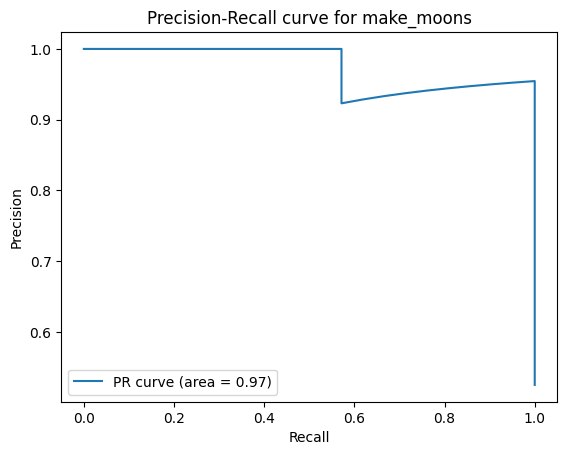

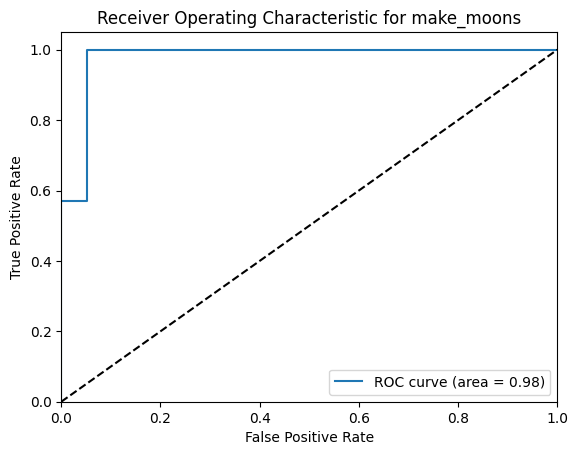

Dataset: make_circles
Precision: 1.0
Recall: 0.7916666666666666
Accuracy: 0.875
AUC: 0.9921875


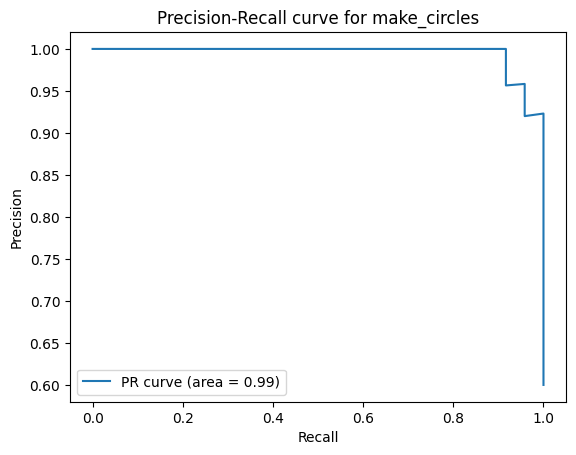

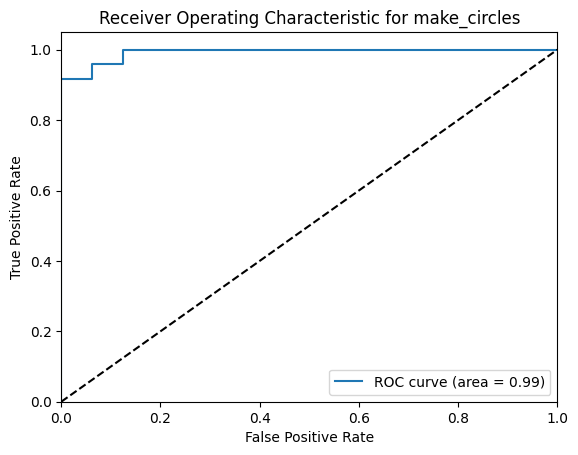

In [6]:
binary_classification(make_moons(noise=0.3, random_state=0), "make_moons")
binary_classification(make_circles(noise=0.2, factor=0.5, random_state=1), "make_circles")